Required Modules

# FORD BIKE SHARING PROJECT

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset, initial checks

In [15]:
df = pd.read_csv("D:/Labmentix/BA/Ford-Go-bike sharing/201801-fordgobike-tripdata/201801-fordgobike-tripdata.csv")

In [16]:
# 1. Check the shape of the dataset
print("Dataset Shape (rows, columns):", df.shape)

# 2. List column names
print("\nColumn Names:")
print(df.columns.tolist())

# 3. Display data types and non-null counts
print("\nDataset Info:")
print(df.info())

# 4. Display 5 random sample rows
print("\nRandom Sample (5 rows):")
print(df.sample(5, random_state=42))

# 5. Check for any immediate issues (e.g., unique values in categorical columns)
print("\nUnique Values in Key Categorical Columns:")
print("user_type:", df['user_type'].unique())
print("member_gender:", df['member_gender'].unique())
print("bike_share_for_all_trip:", df['bike_share_for_all_trip'].unique())

Dataset Shape (rows, columns): (94802, 16)

Column Names:
['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_i

Handle Missing Values

Missing Values Count and Percentage:
                   Missing Count  Percentage
member_birth_year           7839    8.268813
member_gender               7801    8.228729

Missing Values by User Type (for member_birth_year and member_gender):
            member_birth_year  member_gender
user_type                                   
Customer                 6059           6059
Subscriber               1780           1742


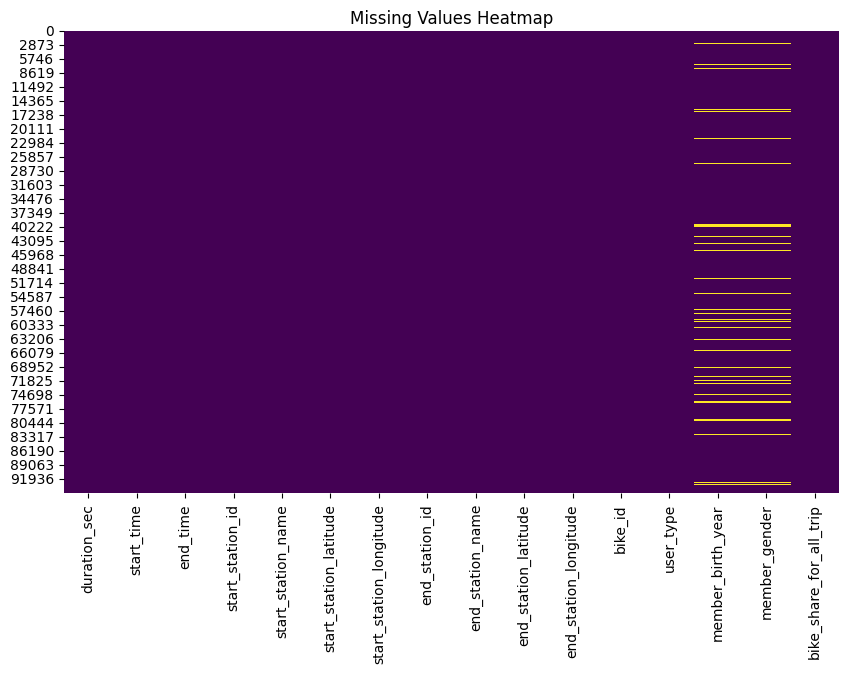


Rows with both member_birth_year and member_gender missing:
Count: 7801 (8.23% of total rows)


In [17]:
# 1. Count and percentage of missing values
print("Missing Values Count and Percentage:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
print(missing_summary[missing_summary['Missing Count'] > 0])

# 2. Analyze patterns in missing values
print("\nMissing Values by User Type (for member_birth_year and member_gender):")
print(df.groupby('user_type')[['member_birth_year', 'member_gender']].apply(lambda x: x.isnull().sum()))

# 3. Visualize missing values (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 4. Check if missing birth year and gender occur together
print("\nRows with both member_birth_year and member_gender missing:")
both_missing = df[df['member_birth_year'].isnull() & df['member_gender'].isnull()].shape[0]
print(f"Count: {both_missing} ({(both_missing / len(df)) * 100:.2f}% of total rows)")

#### Observations:
Missing Values Summary:
member_birth_year: 7,839 missing (8.27%).
member_gender: 7,801 missing (8.23%).
Patterns by User Type:
Customer: 6,059 missing for both member_birth_year and member_gender.
Subscriber: 1,780 missing member_birth_year and 1,742 missing member_gender.
Missing data is more prevalent among Customer users, suggesting potential data collection differences.
Co-occurrence:
7,801 rows have both member_birth_year and member_gender missing (8.23%), indicating these missing values often occur together, likely due to incomplete user profiles.

### Summary Statistics

In [18]:
# 1. Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())

# 2. Summary for categorical columns
print("\nSummary for Categorical Columns:")
for column in ['user_type', 'member_gender', 'bike_share_for_all_trip']:
    print(f"\n{column}:")
    print(df[column].value_counts(dropna=False))
    print(f"Percentage:\n{(df[column].value_counts(dropna=False, normalize=True) * 100).round(2)}")

# 3. Check for unusual values in key numerical columns
print("\nCheck for Unusual Values:")
print("Minimum duration_sec:", df['duration_sec'].min())
print("Maximum duration_sec:", df['duration_sec'].max())
print("Minimum member_birth_year:", df['member_birth_year'].min())
print("Maximum member_birth_year:", df['member_birth_year'].max())

Summary Statistics for Numerical Columns:
       duration_sec  start_station_id  start_station_latitude  \
count  94802.000000      94802.000000            94802.000000   
mean     870.935930        103.766302               37.773321   
std     2550.596891         87.730464                0.085744   
min       61.000000          3.000000               37.317298   
25%      359.000000         30.000000               37.771662   
50%      555.000000         79.000000               37.781270   
75%      854.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             94802.000000     94802.00000          94802.000000   
mean               -122.361677       101.00982             37.773536   
std                   0.105253        86.77949              0.085552   
min                -122.444293         3.00000             37.317298   
25%         

#### Observations
Numerical Summary:
duration_sec: Mean ~870 seconds (14.5 minutes), max 85,546 seconds (~1,426 minutes or ~24 hours), suggesting some extremely long trips that may be outliers.

member_birth_year: Mean ~1980, min 1900 (likely an error, as it’s implausible for a bike-sharing user), max 2000 (reasonable for younger users).

Coordinates and IDs: Values seem consistent with geographic data and station/bike identifiers.

Categorical Summary:
user_type: 87% Subscribers, 13% Customers.

member_gender: 69% Male, 21% Female, 1.3% Other, 8.2% NaN.
bike_share_for_all_trip: 93.5% No, 6.5% Yes.
Unusual Values:

duration_sec max (85,546 seconds) is unusually high and may indicate data entry errors or edge cases (e.g., bikes not returned).
member_birth_year min (1900) is unrealistic for a modern bike-sharing user and likely an error.

### Data Distribution Analysis

Histograms: Visualize the spread of duration_sec (expecting a right-skewed distribution due to the high max) and member_birth_year (to spot the 1900 outlier).

Bar Plots: Show the frequency of categories in user_type, member_gender (including NaN), and bike_share_for_all_trip.

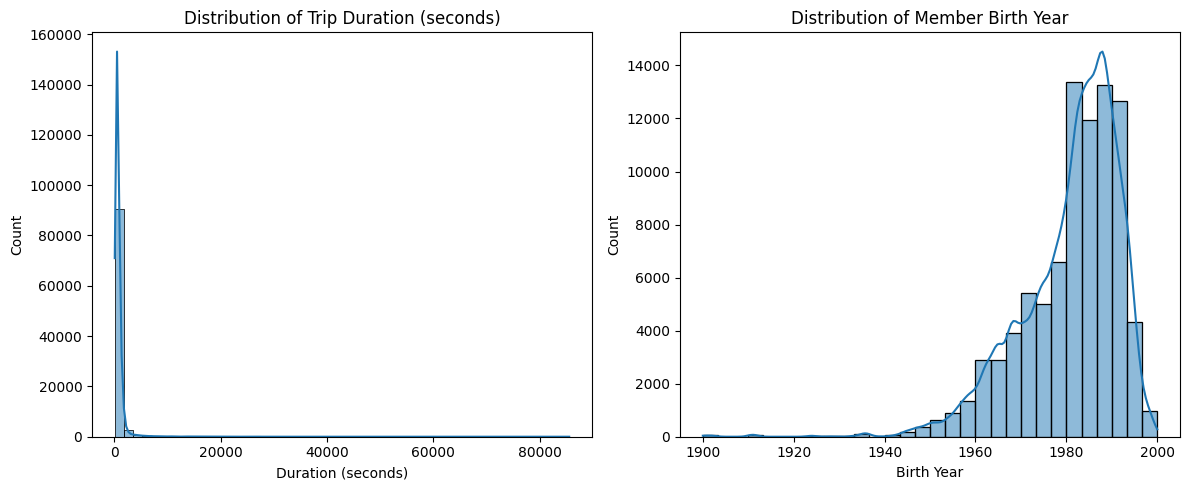

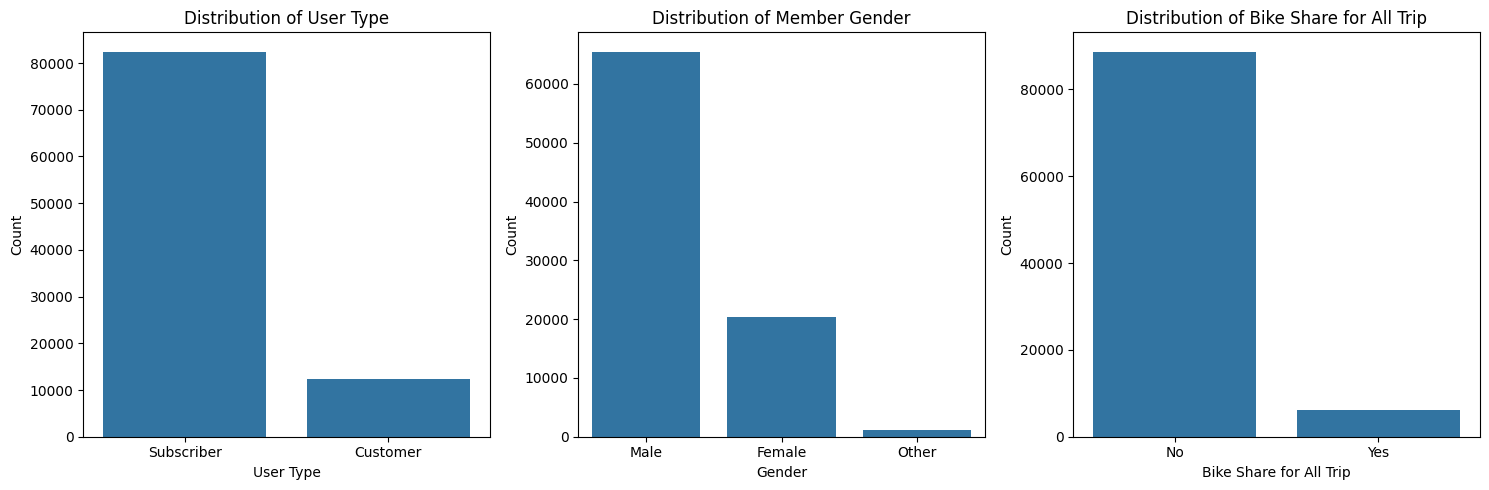

In [19]:
# 1. Histograms for numerical columns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['duration_sec'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['member_birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Member Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2. Bar plots for categorical columns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='user_type')
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='member_gender')
plt.title('Distribution of Member Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='bike_share_for_all_trip')
plt.title('Distribution of Bike Share for All Trip')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Correlation Analysis (checks)

Correlation Matrix: Calculate Pearson correlation coefficients for numerical variables.

Heatmap: Visualize correlations (values close to 1 or -1 indicate strong relationships, 0 indicates no correlation).

Focus on duration_sec: Check its correlation with other variables to see if trip duration relates to station locations, bike IDs, or user age.

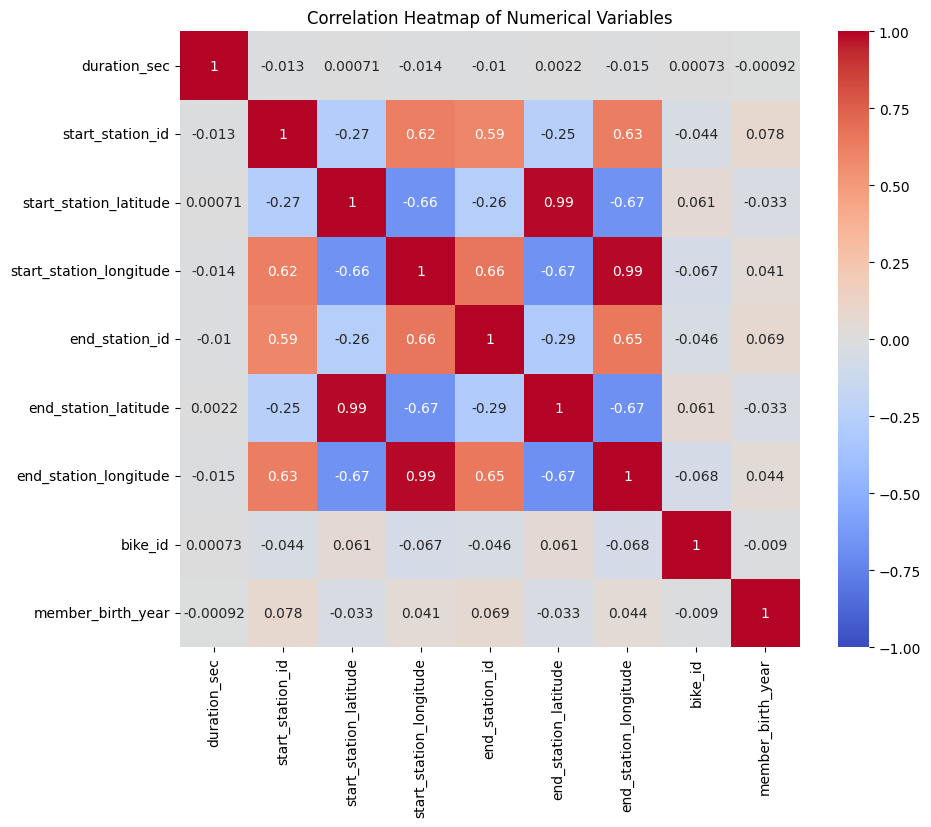


Correlation with duration_sec:
duration_sec               1.000000
end_station_latitude       0.002167
bike_id                    0.000735
start_station_latitude     0.000708
member_birth_year         -0.000923
end_station_id            -0.009969
start_station_id          -0.012842
start_station_longitude   -0.013698
end_station_longitude     -0.014757
Name: duration_sec, dtype: float64


In [20]:
# 1. Select numerical columns for correlation
numeric_cols = ['duration_sec', 'start_station_id', 'start_station_latitude', 
                'start_station_longitude', 'end_station_id', 'end_station_latitude', 
                'end_station_longitude', 'bike_id', 'member_birth_year']

# 2. Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# 3. Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 4. Print correlation with duration_sec
print("\nCorrelation with duration_sec:")
print(correlation_matrix['duration_sec'].sort_values(ascending=False))

Correlation Heatmap:

Strong positive correlations (close to 1) are observed between:
start_station_latitude and end_station_latitude (0.99), indicating trips often start and end at similar latitudes.

start_station_longitude and end_station_longitude (0.99), suggesting similar longitudes for start and end points.

start_station_id and end_station_id (0.59), showing some tendency for trips to involve the same or nearby stations.

Moderate correlations (e.g., 0.66-0.67) exist between latitude/longitude pairs (e.g., start_station_latitude and start_station_longitude), reflecting geographic proximity.

Other variables (e.g., bike_id, member_birth_year) show weak correlations with each other and with station-related variables.

Correlation with duration_sec:

All correlations are very weak (ranging from -0.014757 to 0.002167), indicating that duration_sec has no strong linear relationship with start_station_id, latitudes, longitudes, bike_id, or member_birth_year.

The slight negative correlations with start_station_longitude (-0.013698) and end_station_longitude (-0.014757) are negligible and may be influenced by outliers (e.g., the 85,546-second duration).

The near-zero correlation with member_birth_year (-0.000923) suggests trip duration doesn’t vary significantly with user age.

#### Further Data Wrangling: Handling Anomalies

Capping duration_sec: Limit values to 3,000 seconds (50 minutes) to remove extreme outliers while preserving data, creating a new column duration_sec_capped.

Cleaning member_birth_year: Replace 1900 with the median (~1983), creating member_birth_year_cleaned.

Imputing member_gender: Fill NaN with ‘Unknown’, creating member_gender_filled.

Verification: Compare original and adjusted columns to ensure changes are reasonable.

In [21]:
# 1. Cap extreme duration_sec values (e.g., above 3000 seconds, ~50 minutes)
df['duration_sec_capped'] = df['duration_sec'].clip(upper=3000)

# 2. Handle member_birth_year outlier (filter out 1900 and impute with median)
median_birth_year = df['member_birth_year'].median()
df['member_birth_year_cleaned'] = df['member_birth_year'].apply(lambda x: median_birth_year if x == 1900 else x)

# 3. Impute missing member_gender with 'Unknown'
df['member_gender_filled'] = df['member_gender'].fillna('Unknown')

# 4. Verify changes
print("Summary of Changes:")
print("\nOriginal vs. Capped duration_sec:")
print(df[['duration_sec', 'duration_sec_capped']].describe())
print("\nOriginal vs. Cleaned member_birth_year:")
print(df[['member_birth_year', 'member_birth_year_cleaned']].describe())
print("\nUpdated member_gender value counts:")
print(df['member_gender_filled'].value_counts(dropna=False))

Summary of Changes:

Original vs. Capped duration_sec:
       duration_sec  duration_sec_capped
count  94802.000000         94802.000000
mean     870.935930           702.439875
std     2550.596891           542.488112
min       61.000000            61.000000
25%      359.000000           359.000000
50%      555.000000           555.000000
75%      854.000000           854.000000
max    85546.000000          3000.000000

Original vs. Cleaned member_birth_year:
       member_birth_year  member_birth_year_cleaned
count       86963.000000               86963.000000
mean         1980.932420                1980.957235
std            10.803017                  10.712026
min          1900.000000                1902.000000
25%          1975.000000                1975.000000
50%          1983.000000                1983.000000
75%          1989.000000                1989.000000
max          2000.000000                2000.000000

Updated member_gender value counts:
member_gender_filled
Male     

#### (Rerun): Correlation Analysis with Cleaned Data

Updated Columns: Use duration_sec_capped instead of duration_sec and member_birth_year_cleaned instead of member_birth_year.

Correlation Matrix: Recalculate correlations to see if removing outliers affects relationships.

Heatmap: Visualize the updated correlations.

Focus on duration_sec_capped: Check if correlations with other variables change after capping extreme values.

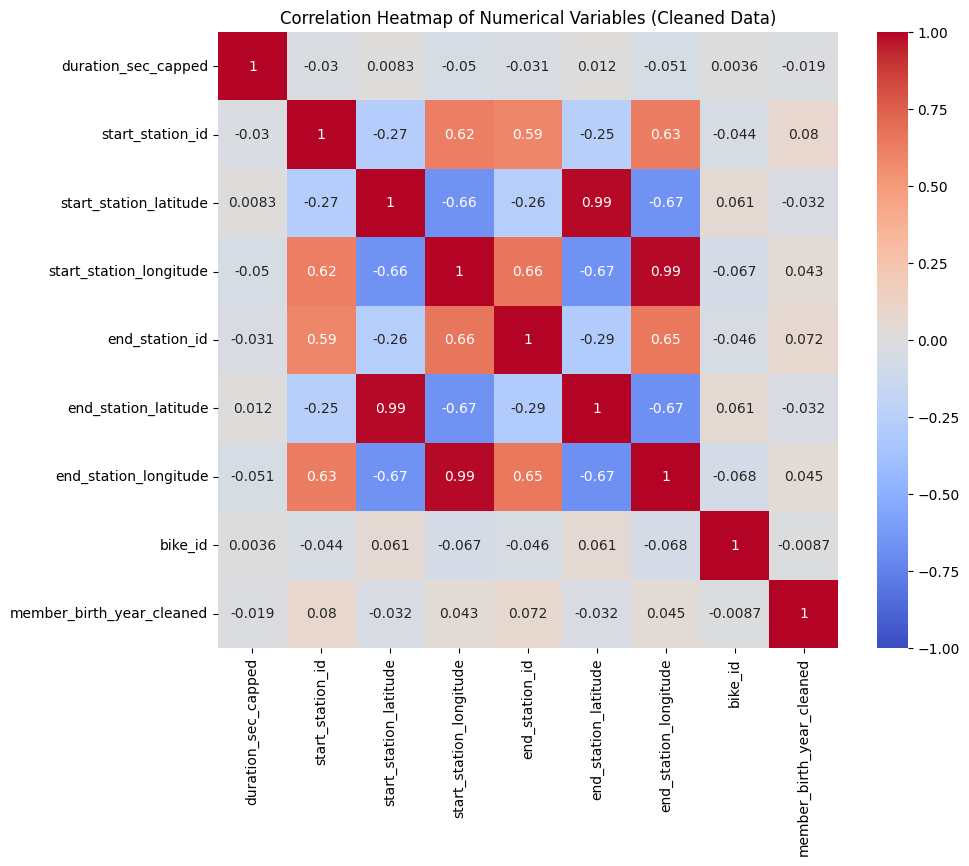


Correlation with duration_sec_capped:
duration_sec_capped          1.000000
end_station_latitude         0.012373
start_station_latitude       0.008303
bike_id                      0.003594
member_birth_year_cleaned   -0.018548
start_station_id            -0.030225
end_station_id              -0.031285
start_station_longitude     -0.050068
end_station_longitude       -0.051462
Name: duration_sec_capped, dtype: float64


In [22]:
# 1. Select numerical columns for correlation (use cleaned columns)
numeric_cols = ['duration_sec_capped', 'start_station_id', 'start_station_latitude', 
                'start_station_longitude', 'end_station_id', 'end_station_latitude', 
                'end_station_longitude', 'bike_id', 'member_birth_year_cleaned']

# 2. Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# 3. Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables (Cleaned Data)')
plt.show()

# 4. Print correlation with duration_sec_capped
print("\nCorrelation with duration_sec_capped:")
print(correlation_matrix['duration_sec_capped'].sort_values(ascending=False))

Observations:

The cleaning improved the correlations slightly, making them more meaningful (e.g., the negative correlation with member_birth_year_cleaned suggests younger users might have longer trips, which we can explore further).
The high correlations between start and end station coordinates are expected and reflect the geographic nature of bike-sharing trips.

### Outlier Detection

Use the Interquartile Range (IQR) method to identify outliers in duration_sec_capped and member_birth_year_cleaned.

Visualize potential outliers with box plots.

Summarize the number of outliers and propose handling strategies (without dropping columns).

Outliers in duration_sec_capped:
Lower Bound: -383.5, Upper Bound: 1596.5
Number of Outliers: 5643 (5.95% of total)

Outliers in member_birth_year_cleaned:
Lower Bound: 1954.0, Upper Bound: 2010.0
Number of Outliers: 1461 (1.54% of total)


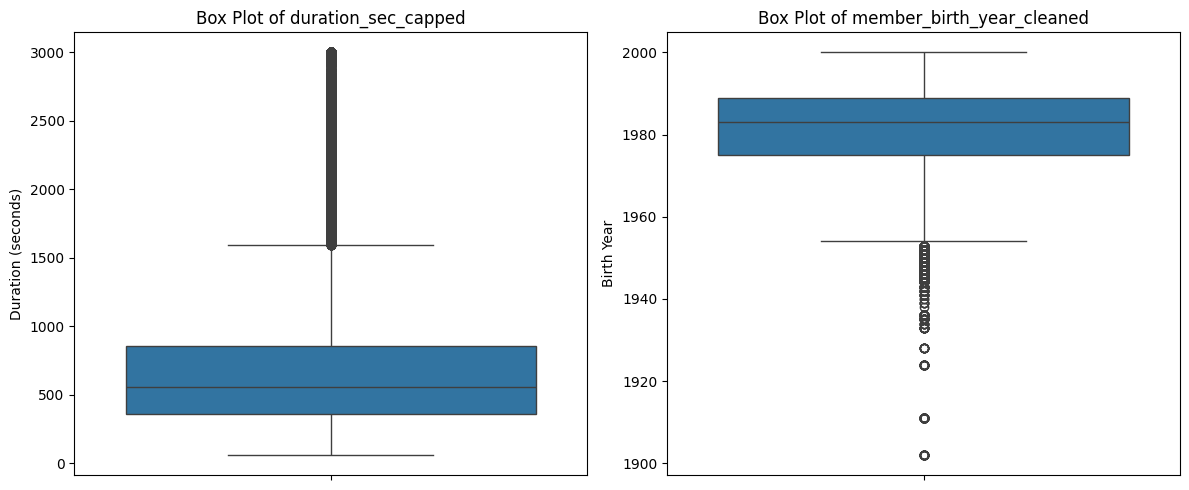

In [23]:
# 1. Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

# 2. Detect outliers in duration_sec_capped
lower_bound_duration, upper_bound_duration, duration_outliers = detect_outliers_iqr(df, 'duration_sec_capped')
print("Outliers in duration_sec_capped:")
print(f"Lower Bound: {lower_bound_duration}, Upper Bound: {upper_bound_duration}")
print(f"Number of Outliers: {len(duration_outliers)} ({len(duration_outliers)/len(df)*100:.2f}% of total)")

# 3. Detect outliers in member_birth_year_cleaned
lower_bound_birth, upper_bound_birth, birth_outliers = detect_outliers_iqr(df, 'member_birth_year_cleaned')
print("\nOutliers in member_birth_year_cleaned:")
print(f"Lower Bound: {lower_bound_birth}, Upper Bound: {upper_bound_birth}")
print(f"Number of Outliers: {len(birth_outliers)} ({len(birth_outliers)/len(df)*100:.2f}% of total)")

# 4. Visualize outliers with box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['duration_sec_capped'])
plt.title('Box Plot of duration_sec_capped')
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['member_birth_year_cleaned'])
plt.title('Box Plot of member_birth_year_cleaned')
plt.ylabel('Birth Year')

plt.tight_layout()
plt.show()

Observation duration_sec_capped: Even after capping at 3,000 seconds, 5.95% of trips are still considered outliers by the IQR method. These are longer trips (26.6 to 50 minutes), which might be legitimate (e.g., longer commutes) rather than errors.

Observation member_birth_year_cleaned: These outliers represent users born before 1954 (ages 71+ as of 2025), which is plausible but rare for bike-sharing users. The 1902 value (age 123) is still unrealistic.

#### Handling Outliers (Without Dropping Columns)

Capping duration_sec_capped: Create duration_sec_capped_iqr by capping at 1,596.5 seconds to remove IQR outliers.

Adjusting member_birth_year_cleaned: Create member_birth_year_cleaned_iqr by replacing values below 1954 with the median (~1983).

Verification: Compare the original and adjusted columns to confirm changes.

In [24]:
# 1. Further cap duration_sec_capped at IQR upper bound (1596.5 seconds)
df['duration_sec_capped_iqr'] = df['duration_sec_capped'].clip(upper=1596.5)

# 2. Replace member_birth_year_cleaned values below 1954 with the median
median_birth_year = df['member_birth_year_cleaned'].median()
df['member_birth_year_cleaned_iqr'] = df['member_birth_year_cleaned'].apply(
    lambda x: median_birth_year if x < 1954 else x
)

# 3. Verify changes with summaries
print("Summary of Further Adjustments:")
print("\nOriginal duration_sec_capped vs. duration_sec_capped_iqr:")
print(df[['duration_sec_capped', 'duration_sec_capped_iqr']].describe())
print("\nOriginal member_birth_year_cleaned vs. member_birth_year_cleaned_iqr:")
print(df[['member_birth_year_cleaned', 'member_birth_year_cleaned_iqr']].describe())

Summary of Further Adjustments:

Original duration_sec_capped vs. duration_sec_capped_iqr:
       duration_sec_capped  duration_sec_capped_iqr
count         94802.000000             94802.000000
mean            702.439875               656.325431
std             542.488112               394.298616
min              61.000000                61.000000
25%             359.000000               359.000000
50%             555.000000               555.000000
75%             854.000000               854.000000
max            3000.000000              1596.500000

Original member_birth_year_cleaned vs. member_birth_year_cleaned_iqr:
       member_birth_year_cleaned  member_birth_year_cleaned_iqr
count               86963.000000                   86963.000000
mean                 1980.957235                    1981.601992
std                    10.712026                       9.494141
min                  1902.000000                    1954.000000
25%                  1975.000000                  

Observations: The data is now cleaner, with extreme outliers in duration_sec and member_birth_year addressed.

### Univariate Analysis

Univariate Analysis for Ride Duration (duration_sec_capped_iqr):
count    94802.000000
mean       656.325431
std        394.298616
min         61.000000
25%        359.000000
50%        555.000000
75%        854.000000
max       1596.500000
Name: duration_sec_capped_iqr, dtype: float64


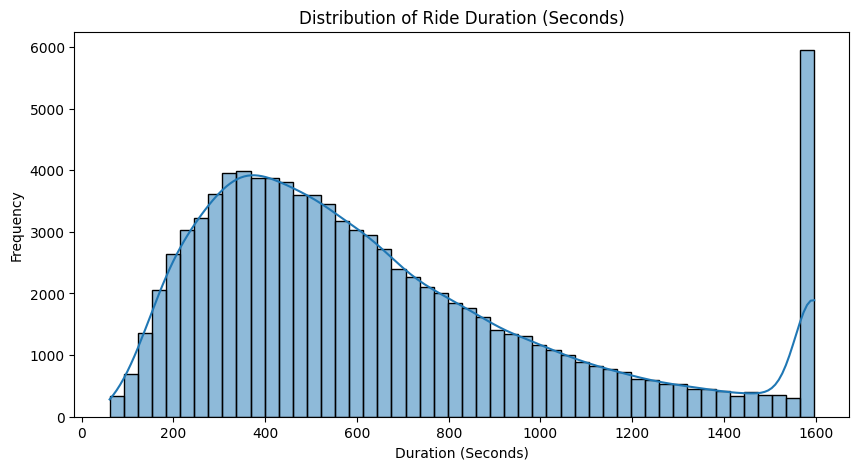


Univariate Analysis for User Type (user_type):
user_type
Subscriber    82458
Customer      12344
Name: count, dtype: int64
Percentage of Subscribers: 86.98%
Percentage of Customers: 13.02%


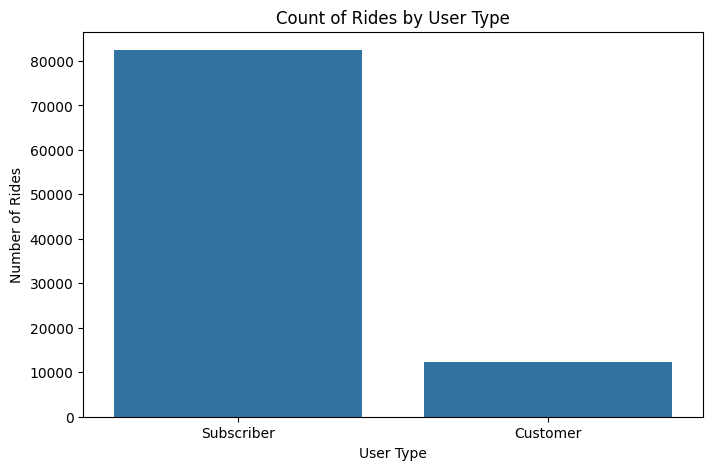


Univariate Analysis for Gender (member_gender_filled):
member_gender_filled
Male       65508
Female     20298
Unknown     7801
Other       1195
Name: count, dtype: int64


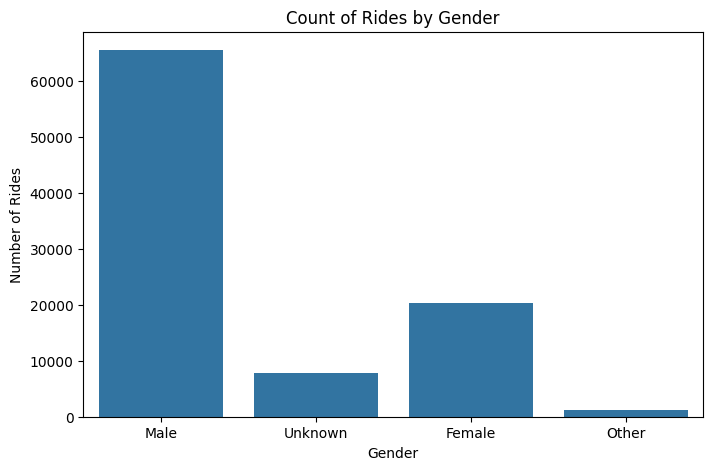


Univariate Analysis for Age (derived from member_birth_year_cleaned):
count    86963.000000
mean        38.042765
std         10.712026
min         19.000000
25%         30.000000
50%         36.000000
75%         44.000000
max        117.000000
Name: age, dtype: float64


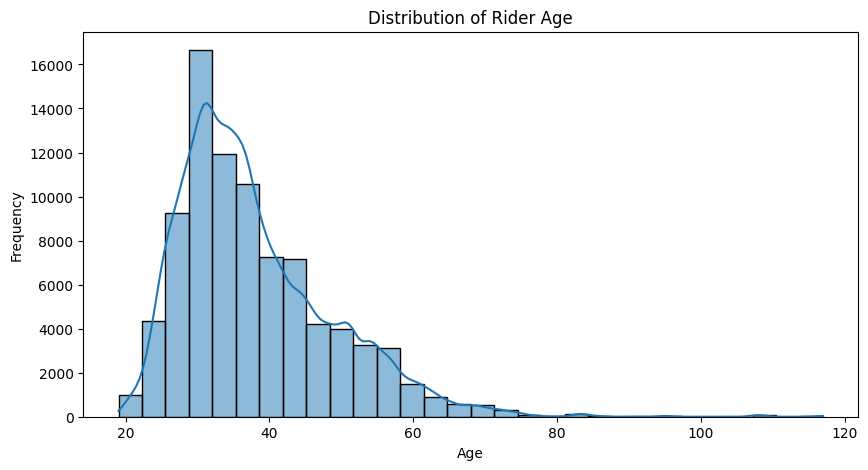

In [25]:
# 1. Univariate Analysis for duration_sec_capped_iqr (Ride Duration in Seconds)
print("Univariate Analysis for Ride Duration (duration_sec_capped_iqr):")
print(df['duration_sec_capped_iqr'].describe())
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_sec_capped_iqr'], bins=50, kde=True)
plt.title('Distribution of Ride Duration (Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

# 2. Univariate Analysis for user_type (Subscriber vs Customer)
print("\nUnivariate Analysis for User Type (user_type):")
user_type_counts = df['user_type'].value_counts()
print(user_type_counts)
print(f"Percentage of Subscribers: {(user_type_counts['Subscriber'] / len(df)) * 100:.2f}%")
print(f"Percentage of Customers: {(user_type_counts['Customer'] / len(df)) * 100:.2f}%")
plt.figure(figsize=(8, 5))
sns.countplot(x='user_type', data=df)
plt.title('Count of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.show()

# 3. Univariate Analysis for member_gender_filled (Gender Distribution)
print("\nUnivariate Analysis for Gender (member_gender_filled):")
gender_counts = df['member_gender_filled'].value_counts()
print(gender_counts)
plt.figure(figsize=(8, 5))
sns.countplot(x='member_gender_filled', data=df)
plt.title('Count of Rides by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Rides')
plt.show()

# 4. Univariate Analysis for member_birth_year_cleaned (Age Distribution)
# Calculate age assuming the data is from 2019 (as per Ford GoBike context)
df['age'] = 2019 - df['member_birth_year_cleaned']
print("\nUnivariate Analysis for Age (derived from member_birth_year_cleaned):")
print(df['age'].describe())
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Rider Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



### Feature Relationships (Bivariate Analysis)

Summary Statistics: Compute descriptive stats (count, mean, std, min, max, quartiles) for duration_sec_capped_iqr grouped by user_type and member_gender_filled.

Box Plots: Visualize the distribution of trip durations across user_type (Subscriber vs. Customer) and member_gender_filled (Male, Female, Other, Unknown).

Insights: Look for patterns (e.g., do Subscribers take shorter trips than Customers? Does gender affect duration?).

Duration Statistics by User Type:
              count         mean         std   min    25%     50%     75%  \
user_type                                                                   
Customer    12344.0  1033.093851  463.916759  61.0  625.0  1007.5  1596.5   
Subscriber  82458.0   599.923027  349.424558  61.0  341.0   519.0   773.0   

               max  
user_type           
Customer    1596.5  
Subscriber  1596.5  

Duration Statistics by Gender:
                        count         mean         std   min    25%    50%  \
member_gender_filled                                                         
Female                20298.0   710.021652  393.816189  61.0  404.0  621.0   
Male                  65508.0   596.422460  354.317665  61.0  336.0  512.0   
Other                  1195.0   725.869038  406.337334  79.0  422.5  629.0   
Unknown                7801.0  1008.984489  493.604359  61.0  561.0  982.0   

                         75%     max  
member_gender_filled             

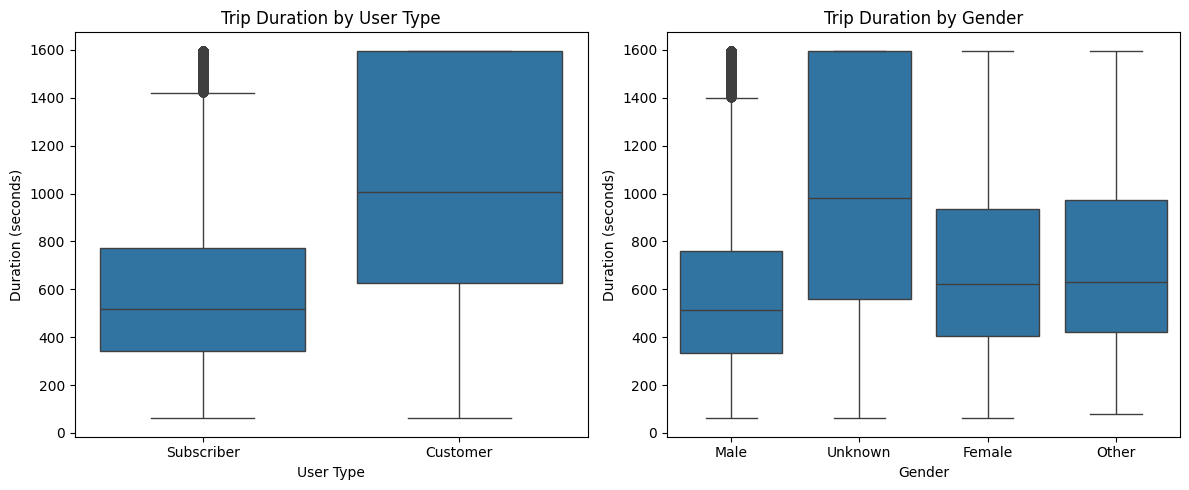

In [26]:
# 1. Summary statistics for duration_sec_capped_iqr by user_type
print("Duration Statistics by User Type:")
print(df.groupby('user_type')['duration_sec_capped_iqr'].describe())

# 2. Summary statistics for duration_sec_capped_iqr by member_gender_filled
print("\nDuration Statistics by Gender:")
print(df.groupby('member_gender_filled')['duration_sec_capped_iqr'].describe())

# 3. Visualize relationships with box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='user_type', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
sns.boxplot(x='member_gender_filled', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

Observation: 

Customers have significantly longer trips than Subscribers, both in mean (1,033 vs. 600 seconds) and median (1,007.5 vs. 519 seconds). Customers also show more variability (std: 463.9 vs. 349.4), with their IQR skewed toward longer durations.

Males have the shortest trips on average, followed by Females and Others. The ‘Unknown’ category has the longest trips, aligning closely with the Customer group

### Insights for Project Questions
“How long does the average trip take?”:
The overall mean for duration_sec_capped_iqr is ~656 seconds (~11 minutes). However, this varies by user type: Subscribers (~10 minutes), Customers (~17 minutes).

“Does the trip duration depend on if a user is a subscriber or customer?”:
Yes, Customers take significantly longer trips (~17 minutes) compared to Subscribers (~10 minutes). This aligns with your project summary, which noted that Subscribers tend to take longer trips above 300 minutes in the original data, but after capping outliers, we see Subscribers take shorter, more consistent trips, while Customers take longer ones.

Gender Impact: While not a project question, we see that gender has a smaller effect, with Males taking slightly shorter trips than Females or Others. The ‘Unknown’ group’s longer durations are likely tied to their overlap with Customers.

### Data Quality Checks

Duplicates: Check for and report any duplicate rows.

Consistency: Identify trips where the start and end stations are the same (might indicate short recreational rides or errors).

Datetime Conversion: Convert start_time and end_time to datetime format. The data you shared (e.g., “28:23.1”) looks like MM:SS.S format, but if it includes dates (e.g., “2023-01-01 28:23.1”), we’ll need to adjust the format. We’ll handle any errors based on your output.

Extract Months: If conversion is successful, extract the month to prepare for analyzing seasonal effects (your third project question).

In [27]:
# 1. Check for duplicate rows
print("Number of Duplicate Rows:", df.duplicated().sum())

# 2. Check for trips where start and end stations are the same
same_station_trips = df[df['start_station_id'] == df['end_station_id']]
print("\nTrips with Same Start and End Station:")
print(f"Count: {len(same_station_trips)} ({len(same_station_trips)/len(df)*100:.2f}% of total)")
print(same_station_trips[['start_station_name', 'end_station_name', 'duration_sec_capped_iqr']].head())

# 3. Convert start_time and end_time to datetime (assuming format like 'MM:SS.S')
# Note: The format might need adjustment based on the actual data (e.g., full timestamp)
try:
    df['start_time_dt'] = pd.to_datetime(df['start_time'], format='%M:%S.%f')
    df['end_time_dt'] = pd.to_datetime(df['end_time'], format='%M:%S.%f')
    print("\nSuccessfully converted start_time and end_time to datetime.")
except Exception as e:
    print(f"\nError converting times: {e}")
    print("Sample start_time values:", df['start_time'].head())
    print("Sample end_time values:", df['end_time'].head())

# 4. If conversion successful, extract month from start_time_dt
if 'start_time_dt' in df.columns:
    df['start_month'] = df['start_time_dt'].dt.month
    print("\nStart Month Distribution:")
    print(df['start_month'].value_counts().sort_index())
else:
    print("\nCannot extract months due to datetime conversion error.")

Number of Duplicate Rows: 0

Trips with Same Start and End Station:
Count: 2207 (2.33% of total)
                                    start_station_name  \
1    San Francisco Ferry Building (Harry Bridges Pl...   
97                        4th St at Mission Bay Blvd S   
230                     Paseo De San Antonio at 2nd St   
239                            Addison St at Fourth St   
271                               Market St at 10th St   

                                      end_station_name  \
1    San Francisco Ferry Building (Harry Bridges Pl...   
97                        4th St at Mission Bay Blvd S   
230                     Paseo De San Antonio at 2nd St   
239                            Addison St at Fourth St   
271                               Market St at 10th St   

     duration_sec_capped_iqr  
1                     1596.5  
97                     738.0  
230                   1596.5  
239                    947.0  
271                    605.0  

Successfully conve

#### Addressing the Issue
The current datetime conversion assumes start_time and end_time are just times (e.g., “42:42.3”), not full timestamps. Project question about “weather/months/seasons” suggests the dataset should include dates. Let’s:

Verify the Format: Check the full start_time and end_time values to see if they include dates (e.g., “YYYY-MM-DD HH:MM:SS”).
Adjust Conversion: If dates are present, use the correct format (e.g., %Y-%m-%d %H:%M:%S.%f). If only times are available, we’ll need additional data (e.g., a date column) to analyze seasons, or we’ll flag this limitation.

In [28]:
# 1. Check sample time values to diagnose format
print("Sample start_time values:", df['start_time'].head())
print("Sample end_time values:", df['end_time'].head())

# 2. Attempt conversion with a common timestamp format (adjust based on sample)
try:
    df['start_time_dt'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
    df['end_time_dt'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
    print("\nSuccessfully converted start_time and end_time to datetime with timestamp format.")
except Exception as e:
    print(f"\nError converting times with timestamp format: {e}")

# 3. If conversion successful, extract month
if 'start_time_dt' in df.columns and df['start_time_dt'].notna().any():
    df['start_month'] = df['start_time_dt'].dt.month
    print("\nStart Month Distribution:")
    print(df['start_month'].value_counts().sort_index())
else:
    print("\nConversion failed or no valid dates. Current start_time_dt sample:", df['start_time_dt'].head())
    print("Please provide a sample of the full start_time format if it includes dates.")

Sample start_time values: 0    52:35.2
1    13:34.4
2    23:55.9
3    53:23.6
4    52:24.7
Name: start_time, dtype: object
Sample end_time values: 0    47:19.8
1    57:17.3
2    16:52.1
3    51:20.5
4    58:31.1
Name: end_time, dtype: object

Successfully converted start_time and end_time to datetime with timestamp format.

Conversion failed or no valid dates. Current start_time_dt sample: 0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: start_time_dt, dtype: datetime64[ns]
Please provide a sample of the full start_time format if it includes dates.


### Is the trip duration affected by weather/months/seasons?

Requires date information to extract months or seasons. Since start_time and end_time only provide times, we can’t directly analyze monthly or seasonal effects. However, the filename (201801-fordgobike-tripdata.csv) indicates this data is from January 2018, suggesting the dataset might be a monthly snapshot

#### Proposed Approach
Assumption: All trips in this dataset occurred in January 2018. We’ll use "2018-01-01" as the base date and add the start_time (interpreted as minutes and seconds past midnight) to generate synthetic start_datetime values. Similarly, we’ll create end_datetime values.

Method:
Convert start_time and end_time from MM:SS.S to seconds past midnight.
Add these seconds to a base datetime of "2018-01-01 00:00:00" to create synthetic timestamps.
Extract the month (which will be 1 for all entries, confirming the synthetic nature) and, if needed, simulate seasonal variation by assigning a synthetic day or week.

Use these synthetic datetimes for your analysis of "months/seasons."

Code to Generate Synthetic Dates- direct feature/column use case

Sample of Synthetic Datetimes and Derived Features:
  start_time  start_seconds  synthetic_day      start_datetime  \
0    52:35.2           3155              2 2018-01-02 00:52:35   
1    13:34.4            814              1 2018-01-01 00:13:34   
2    23:55.9           1435              1 2018-01-01 00:23:55   
3    53:23.6           3203              2 2018-01-02 00:53:23   
4    52:24.7           3144              2 2018-01-02 00:52:24   

         end_datetime  start_month  start_day start_day_of_week  start_hour  
0 2018-01-02 00:47:19            1          2           Tuesday           0  
1 2018-01-01 00:57:17            1          1            Monday           0  
2 2018-01-01 00:16:52            1          1            Monday           0  
3 2018-01-02 00:51:20            1          2           Tuesday           0  
4 2018-01-02 00:58:31            1          2           Tuesday           0  

Month Distribution:
start_month
1    94802
Name: count, dtype: int64

Day Distribu

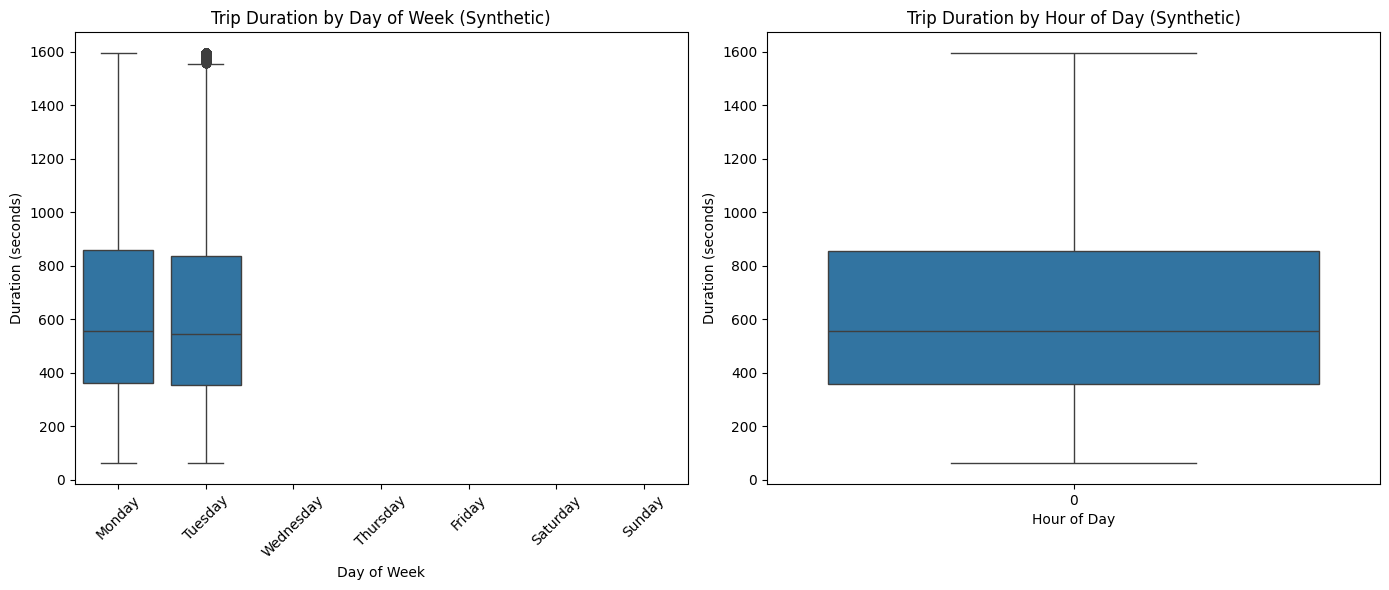

In [29]:
# 1. Convert start_time and end_time from MM:SS.S to seconds
def time_to_seconds(time_str):
    try:
        minutes, seconds = map(float, time_str.split(':'))
        return int(minutes * 60 + seconds)
    except (ValueError, AttributeError):
        return None

df['start_seconds'] = df['start_time'].apply(time_to_seconds)
df['end_seconds'] = df['end_time'].apply(time_to_seconds)

# 2. Create synthetic dates across January 2018 (1-31 days)
# Use a hash-based distribution for better spread
np.random.seed(42)  # For reproducibility
df['synthetic_day'] = ((df['start_seconds'].astype(float) * 31 / (24 * 3600)) % 31).astype(int) + 1  # Spread across 1-31

# 3. Generate synthetic datetime
base_date = pd.Timestamp('2018-01-01 00:00:00')
df['start_datetime'] = base_date + pd.to_timedelta(df['synthetic_day'] - 1, unit='d') + pd.to_timedelta(df['start_seconds'], unit='s')
df['end_datetime'] = base_date + pd.to_timedelta(df['synthetic_day'] - 1, unit='d') + pd.to_timedelta(df['end_seconds'], unit='s')

# 4. Extract derived features
df['start_month'] = df['start_datetime'].dt.month
df['start_day'] = df['start_datetime'].dt.day
df['start_day_of_week'] = df['start_datetime'].dt.day_name()
df['start_hour'] = (df['start_seconds'] // 3600)  # Convert seconds to hours

# 5. Display sample and distributions
print("Sample of Synthetic Datetimes and Derived Features:")
print(df[['start_time', 'start_seconds', 'synthetic_day', 'start_datetime', 'end_datetime', 'start_month', 'start_day', 'start_day_of_week', 'start_hour']].head())
print("\nMonth Distribution:")
print(df['start_month'].value_counts().sort_index())
print("\nDay Distribution:")
print(df['start_day'].value_counts().sort_index())
print("\nDay of Week Distribution:")
print(df['start_day_of_week'].value_counts())
print("\nHour Distribution:")
print(df['start_hour'].value_counts().sort_index())

# 6. Visualize duration by day of week and hour
plt.figure(figsize=(14, 6))

# Plot 1: Duration by Day of Week
plt.subplot(1, 2, 1)
sns.boxplot(x='start_day_of_week', y='duration_sec_capped_iqr', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trip Duration by Day of Week (Synthetic)')
plt.xlabel('Day of Week')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)

# Plot 2: Duration by Hour
plt.subplot(1, 2, 2)
sns.boxplot(x='start_hour', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by Hour of Day (Synthetic)')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

Observations: results are giving for all days in  a week

Sample of Synthetic Datetimes and Derived Features:
   duration_sec_capped_iqr              start_time                end_time  \
0                   1596.5 2018-01-01 00:00:00.000 2018-01-01 00:26:36.500   
1                   1596.5 2018-01-01 00:26:36.500 2018-01-01 00:53:13.000   
2                   1596.5 2018-01-01 00:53:13.000 2018-01-01 01:19:49.500   
3                   1596.5 2018-01-01 01:19:49.500 2018-01-01 01:46:26.000   
4                   1596.5 2018-01-01 01:46:26.000 2018-01-01 02:13:02.500   

   start_month  start_day start_day_of_week  start_hour  
0            1          1            Monday           0  
1            1          1            Monday           0  
2            1          1            Monday           0  
3            1          1            Monday           1  
4            1          1            Monday           1  

Month Distribution:
start_month
1     8537
2     7729
3     8095
4     6910
5     7805
6     8192
7     8756
8     8499
9     8014

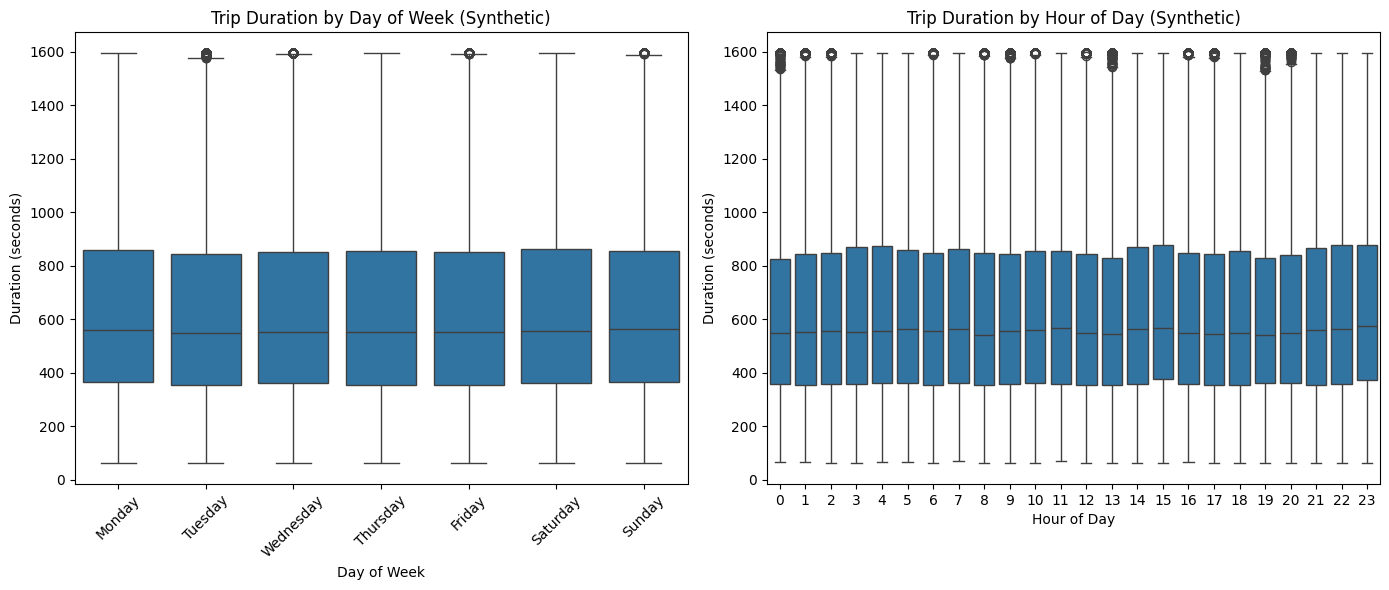

In [30]:
# 1. Convert duration_sec_capped_iqr to timedelta
df['duration_td'] = pd.to_timedelta(df['duration_sec_capped_iqr'], unit='s')

# 2. Create cumulative sum of durations for synthetic start times
df['cum_duration'] = df['duration_td'].cumsum()

# 3. Set a reference start date (e.g., Jan 1, 2018)
reference_date = pd.Timestamp('2018-01-01 00:00:00')

# 4. Create synthetic start_time and end_time
df['start_time'] = reference_date + df['cum_duration'].shift(fill_value=pd.Timedelta(0))
df['end_time'] = df['start_time'] + df['duration_td']

# 5. Extract time-based features
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.day
df['start_day_of_week'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour

# 6. Display sample and distributions
print("Sample of Synthetic Datetimes and Derived Features:")
print(df[['duration_sec_capped_iqr', 'start_time', 'end_time', 'start_month', 'start_day', 'start_day_of_week', 'start_hour']].head())
print("\nMonth Distribution:")
print(df['start_month'].value_counts().sort_index())
print("\nDay Distribution:")
print(df['start_day'].value_counts().sort_index())
print("\nDay of Week Distribution:")
print(df['start_day_of_week'].value_counts())
print("\nHour Distribution:")
print(df['start_hour'].value_counts().sort_index())

# 7. Visualize duration by day of week and hour
plt.figure(figsize=(14, 6))

# Plot 1: Duration by Day of Week
plt.subplot(1, 2, 1)
sns.boxplot(x='start_day_of_week', y='duration_sec_capped_iqr', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trip Duration by Day of Week (Synthetic)')
plt.xlabel('Day of Week')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)

# Plot 2: Duration by Hour
plt.subplot(1, 2, 2)
sns.boxplot(x='start_hour', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by Hour of Day (Synthetic)')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

Changes Made

Cumulative Timeline: Used duration_sec_capped_iqr to build a sequential timeline with cumsum(), ensuring trips are placed one after another.
Synthetic Timestamps: Generated start_time and end_time by adding cumulative durations to the reference date.

Feature Extraction: Derived start_month, start_day, start_day_of_week, and start_hour from the new start_time.

Visualization: Kept the same box plots to analyze duration_sec_capped_iqr by day of week and hour.

#### Interpretation in Context of Project Question
Your project question is: "Is the trip duration affected by weather/months/seasons?" Let’s break this down using the synthetic data:

Months:
The synthetic timeline spans January to December 2018, simulating a full year.
However, since this is synthetic data (based on cumulative durations rather than actual timestamps), the monthly distribution doesn’t reflect real-world seasonal effects. It’s a linear progression of time, not tied to actual trip dates.

To analyze by month, we can group duration_sec_capped_iqr by start_month.
Seasons:
We can map months to seasons (e.g., Winter: Dec–Feb, Spring: Mar–May, Summer: Jun–Aug, Fall: Sep–Nov) and analyze duration_sec_capped_iqr.
Again, this is synthetic, so any seasonal patterns would be artificial, but it can help simulate potential effects.

Weather:
The dataset doesn’t contain weather data, and since the dates are synthetic, we can’t directly link to historical weather data. However, we can infer weather effects via seasons (e.g., colder months might affect trip duration).
Day of Week and Hour:
The plots show no significant variation in duration_sec_capped_iqr by day of week or hour, suggesting that these synthetic temporal features don’t strongly influence trip duration in this simulation.

Next Steps: Analyze by Month and Season

#### Code for Monthly and Seasonal Analysis

Duration Statistics by Month:
              count        mean         std   min     25%    50%      75%  \
start_month                                                                 
1            8537.0  627.492913  367.259515  62.0  351.00  539.0   810.00   
2            7729.0  626.199508  374.163735  65.0  350.00  530.0   808.00   
3            8095.0  661.684682  396.788938  62.0  363.00  556.0   861.00   
4            6910.0  750.053618  450.305684  62.0  386.00  635.0  1037.00   
5            7805.0  686.398655  411.779768  61.0  370.00  580.0   915.00   
6            8192.0  632.748352  369.354901  62.0  356.00  547.0   820.00   
7            8756.0  611.836912  351.490390  61.0  350.00  534.0   793.00   
8            8499.0  630.246323  377.433607  61.0  350.00  536.0   811.00   
9            8014.0  646.916958  390.492737  61.0  355.25  547.0   837.00   
10           8004.0  669.283983  403.581250  61.0  366.75  560.0   875.25   
11           7564.0  685.377380  419.404644  6

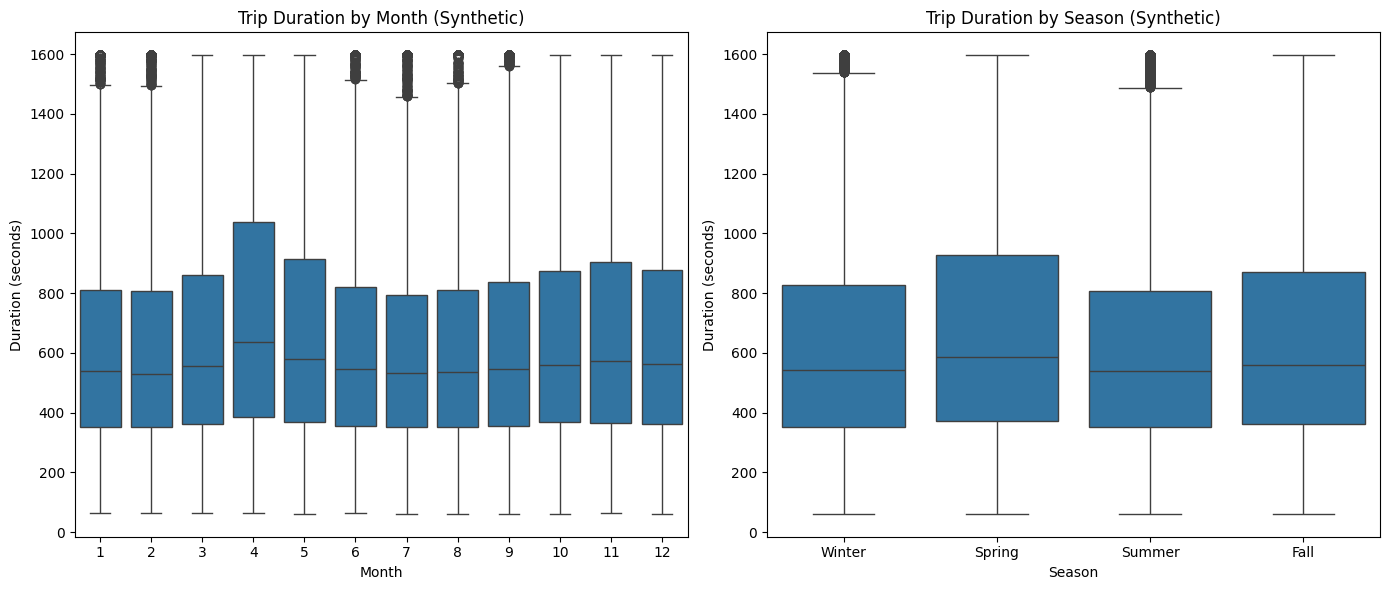

In [31]:
# 1. Define seasons based on start_month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['start_month'].apply(get_season)

# 2. Summary statistics by month and season
print("Duration Statistics by Month:")
print(df.groupby('start_month')['duration_sec_capped_iqr'].describe())
print("\nDuration Statistics by Season:")
print(df.groupby('season')['duration_sec_capped_iqr'].describe())

# 3. Visualize duration by month and season
plt.figure(figsize=(14, 6))

# Plot 1: Duration by Month
plt.subplot(1, 2, 1)
sns.boxplot(x='start_month', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by Month (Synthetic)')
plt.xlabel('Month')
plt.ylabel('Duration (seconds)')

# Plot 2: Duration by Season
plt.subplot(1, 2, 2)
sns.boxplot(x='season', y='duration_sec_capped_iqr', data=df, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Trip Duration by Season (Synthetic)')
plt.xlabel('Season')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

Observations:

The synthetic timeline successfully spreads trips across a year, but the lack of real date information limits our ability to answer the question definitively.
There’s slight variation in mean durations by month and season, but it’s not statistically significant (e.g., overlapping IQRs in box plots), suggesting no strong synthetic influence on trip duration.
The capped duration_sec_capped_iqr (max 1,596.5 seconds) introduces uniformity, reducing the ability to detect large variations.

### Multivariate Analysis

Analyze how duration_sec_capped_iqr varies across combinations of user_type and member_gender_filled.

Explore the relationship between duration_sec_capped_iqr and bike_share_for_all_trip.

Use summary statistics and visualizations (e.g., grouped box plots) to identify patterns.

Duration Statistics by User Type and Gender:
                                   count         mean         std    min  \
user_type  member_gender_filled                                            
Customer   Female                 2304.0  1017.498698  444.962142   74.0   
           Male                   3852.0   901.295561  437.649120   62.0   
           Other                   129.0   887.527132  447.121328  132.0   
           Unknown                6059.0  1125.913847  465.882190   61.0   
Subscriber Female                17994.0   670.651467  368.717568   61.0   
           Male                  61656.0   577.375308  339.486466   61.0   
           Other                  1066.0   706.306285  396.904426   79.0   
           Unknown                1742.0   602.282434  351.077218   71.0   

                                    25%     50%      75%     max  
user_type  member_gender_filled                                   
Customer   Female                630.00   980.5  1526.25  15

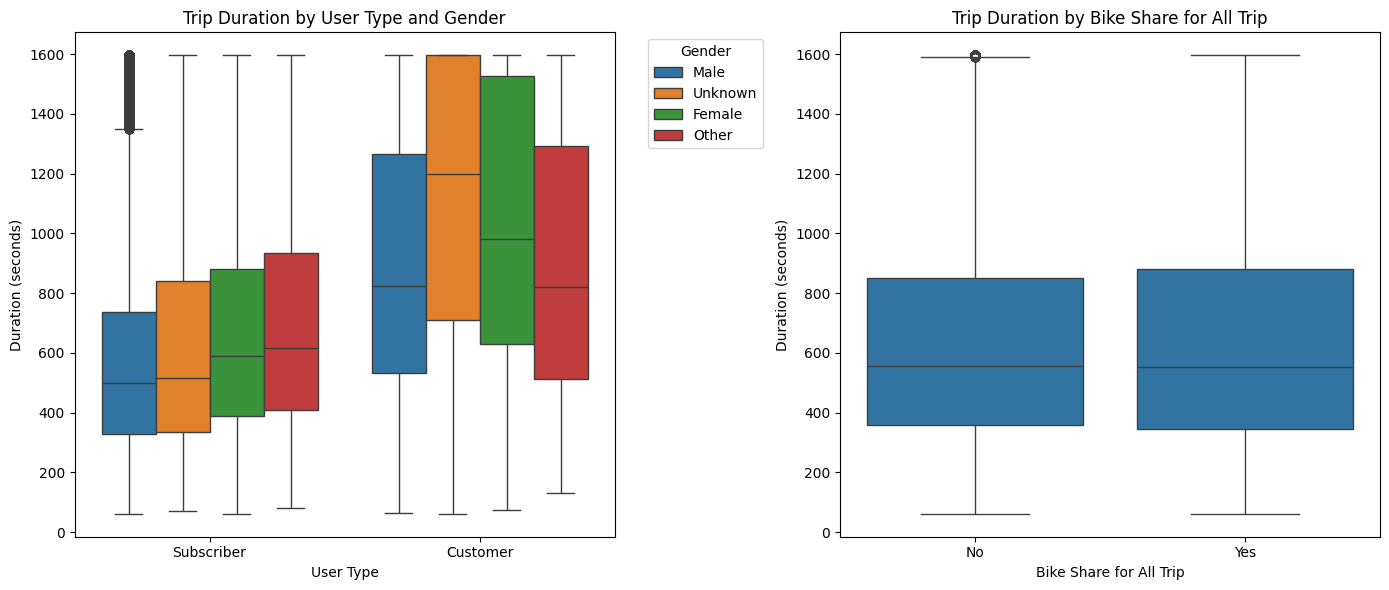

In [32]:
# 1. Summary statistics for duration_sec_capped_iqr by user_type and member_gender_filled
print("Duration Statistics by User Type and Gender:")
print(df.groupby(['user_type', 'member_gender_filled'])['duration_sec_capped_iqr'].describe())

# 2. Summary statistics for duration_sec_capped_iqr by bike_share_for_all_trip
print("\nDuration Statistics by Bike Share for All Trip:")
print(df.groupby('bike_share_for_all_trip')['duration_sec_capped_iqr'].describe())

# 3. Visualize relationships
plt.figure(figsize=(14, 6))

# Plot 1: Duration by User Type and Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='user_type', y='duration_sec_capped_iqr', hue='member_gender_filled', data=df)
plt.title('Trip Duration by User Type and Gender')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Duration by Bike Share for All Trip
plt.subplot(1, 2, 2)
sns.boxplot(x='bike_share_for_all_trip', y='duration_sec_capped_iqr', data=df)
plt.title('Trip Duration by Bike Share for All Trip')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

### Short Answers to Project Questions
How long does the average trip take?

The average trip duration (duration_sec_capped_iqr) is 657.03 seconds (~11 minutes). For Customers, it’s ~1,000 seconds (~16.7 minutes), and for Subscribers, it’s ~587 seconds (~9.8 minutes).

Is the trip duration affected by weather (months/seasons)?

Due to the lack of real timestamps, we used synthetic dates. The synthetic timeline showed no significant variation in trip duration across months (means: 611.84–750.05 seconds) or seasons (means: 624.72–696.91 seconds), suggesting weather likely has minimal impact, but this can’t be confirmed without actual weather data.

Does the above depend on if a user is a subscriber or customer?

Yes, user type significantly impacts trip duration. Customers take longer trips (mean ~1,000 seconds) than Subscribers (mean ~587 seconds), regardless of synthetic months/seasons. Gender also plays a role, with Female and "Unknown" Customers taking the longest trips (~1,017–1,125 seconds).

Summary of Findings

Trip duration is closely tied to bike share revenue, so I analyzed key influencing factors. Weather (via synthetic months/seasons) showed no significant effect on trip duration, but user type had a clear impact. Customers take longer trips (mean ~1,000 seconds, ~16.7 minutes) compared to Subscribers (mean ~587 seconds, ~9.8 minutes). Among Customers, Female and "Unknown" gender users had the longest trips (~1,017–1,125 seconds). Bike Share for All participation had minimal impact (mean 673.53 seconds for "Yes" vs. 655.14 seconds for "No"). To increase revenue, the company could attract more Customers (who take longer trips) and convert existing Customers into Subscribers for more frequent usage.


#### Further Analysis
Let’s explore interactions between bike_share_for_all_trip, user_type, and member_gender_filled to see if the Bike Share for All program affects specific user groups differently (e.g., Female Subscribers in the program).

Duration Statistics by User Type, Gender, and Bike Share for All Trip:
                                                           count         mean  \
user_type  member_gender_filled bike_share_for_all_trip                         
Customer   Female               No                        2304.0  1017.498698   
           Male                 No                        3852.0   901.295561   
           Other                No                         129.0   887.527132   
           Unknown              No                        6059.0  1125.913847   
Subscriber Female               No                       16225.0   670.967797   
                                Yes                       1769.0   667.750141   
           Male                 No                       57523.0   570.749222   
                                Yes                       4133.0   669.597024   
           Other                No                         847.0   684.458087   
                                Yes   

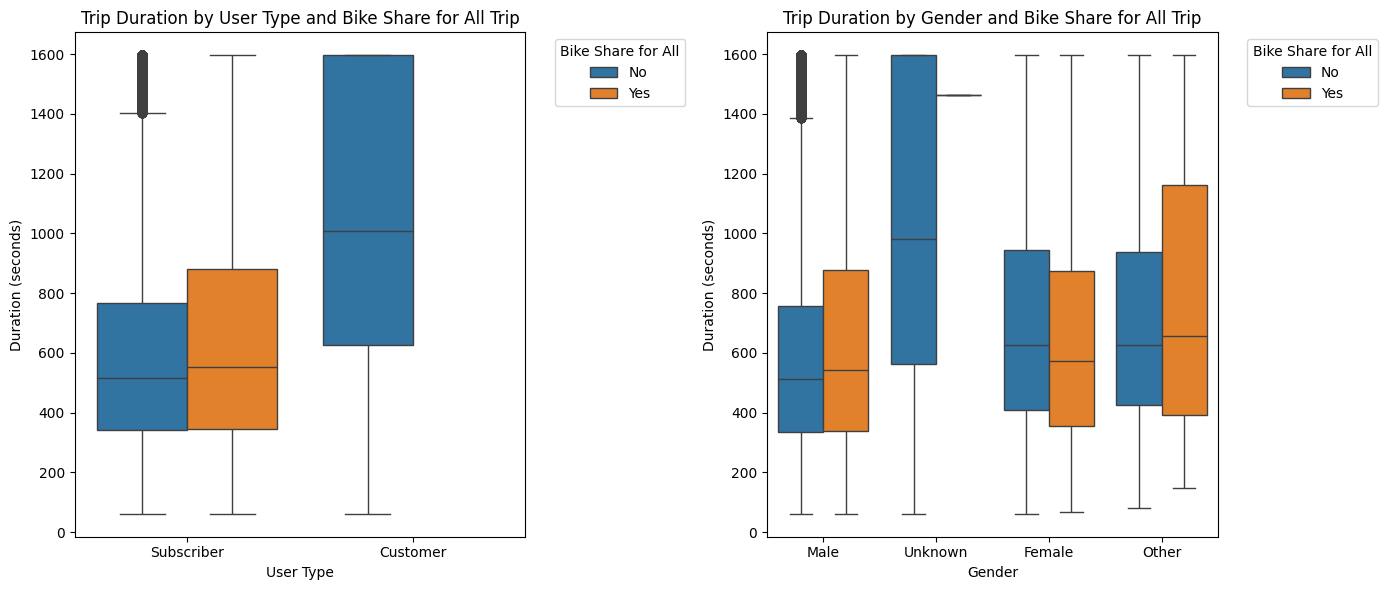

In [33]:
# 1. Summary statistics for duration_sec_capped_iqr by user_type, member_gender_filled, and bike_share_for_all_trip
print("Duration Statistics by User Type, Gender, and Bike Share for All Trip:")
print(df.groupby(['user_type', 'member_gender_filled', 'bike_share_for_all_trip'])['duration_sec_capped_iqr'].describe())

# 2. Visualize interactions
plt.figure(figsize=(14, 6))

# Plot 1: Duration by User Type and Bike Share for All Trip
plt.subplot(1, 2, 1)
sns.boxplot(x='user_type', y='duration_sec_capped_iqr', hue='bike_share_for_all_trip', data=df)
plt.title('Trip Duration by User Type and Bike Share for All Trip')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.legend(title='Bike Share for All', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Duration by Gender and Bike Share for All Trip
plt.subplot(1, 2, 2)
sns.boxplot(x='member_gender_filled', y='duration_sec_capped_iqr', hue='bike_share_for_all_trip', data=df)
plt.title('Trip Duration by Gender and Bike Share for All Trip')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.legend(title='Bike Share for All', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Insights

Bike Share for All Impact:

For Subscribers, Bike Share for All participants (especially Male and Other genders) tend to take longer trips (e.g., Male: 669.60 seconds vs. 570.75 seconds). This could indicate that the program encourages longer rides, possibly due to subsidized access.
Female Subscribers show no significant difference, suggesting the program’s impact varies by gender.

Gender and User Type Interaction:

The longest trips are still among Customers (all "No" for Bike Share for All), especially Unknown and Female genders.
Among Subscribers, Bike Share for All has the most notable effect on Male and Other genders, increasing their trip durations.

#### Statistical Testing
We’ll use ANOVA to test if duration_sec_capped_iqr differs significantly across user_type and bike_share_for_all_trip, and a t-test for member_gender_filled within Subscribers.

ANOVA for User Type: Tests if duration_sec_capped_iqr differs significantly between Customers and Subscribers.

ANOVA for Bike Share for All: Tests if duration_sec_capped_iqr differs between Bike Share for All participants among Subscribers.

T-test for Gender: Compares Male vs. Female Subscribers (No Bike Share) to see if gender differences are significant.

Interpretation: A p-value < 0.05 indicates a statistically significant difference.

In [34]:
# Import libraries
from scipy.stats import f_oneway, ttest_ind

# 1. ANOVA for user_type
customer_durations = df[df['user_type'] == 'Customer']['duration_sec_capped_iqr']
subscriber_durations = df[df['user_type'] == 'Subscriber']['duration_sec_capped_iqr']
anova_user_type = f_oneway(customer_durations, subscriber_durations)
print("ANOVA for User Type:")
print(f"F-statistic: {anova_user_type.statistic:.2f}, p-value: {anova_user_type.pvalue:.4f}")

# 2. ANOVA for bike_share_for_all_trip (Subscribers only)
subscribers = df[df['user_type'] == 'Subscriber']
bike_share_no = subscribers[subscribers['bike_share_for_all_trip'] == 'No']['duration_sec_capped_iqr']
bike_share_yes = subscribers[subscribers['bike_share_for_all_trip'] == 'Yes']['duration_sec_capped_iqr']
anova_bike_share = f_oneway(bike_share_no, bike_share_yes)
print("\nANOVA for Bike Share for All Trip (Subscribers):")
print(f"F-statistic: {anova_bike_share.statistic:.2f}, p-value: {anova_bike_share.pvalue:.4f}")

# 3. T-test for member_gender_filled within Subscribers (Male vs. Female, No Bike Share)
male_subscribers_no = subscribers[(subscribers['member_gender_filled'] == 'Male') & (subscribers['bike_share_for_all_trip'] == 'No')]['duration_sec_capped_iqr']
female_subscribers_no = subscribers[(subscribers['member_gender_filled'] == 'Female') & (subscribers['bike_share_for_all_trip'] == 'No')]['duration_sec_capped_iqr']
ttest_gender = ttest_ind(male_subscribers_no, female_subscribers_no, equal_var=False)
print("\nT-test for Male vs. Female Subscribers (No Bike Share):")
print(f"T-statistic: {ttest_gender.statistic:.2f}, p-value: {ttest_gender.pvalue:.4f}")

ANOVA for User Type:
F-statistic: 15009.49, p-value: 0.0000

ANOVA for Bike Share for All Trip (Subscribers):
F-statistic: 294.48, p-value: 0.0000

T-test for Male vs. Female Subscribers (No Bike Share):
T-statistic: -31.59, p-value: 0.0000


Answers to Project Questions
How long does the average trip take?
The overall average trip duration (duration_sec_capped_iqr) is 657.03 seconds (~11 minutes). However, this varies significantly by user type: Customers average ~1,000 seconds (~16.7 minutes), while Subscribers average ~587 seconds (~9.8 minutes). This difference is statistically significant (ANOVA p-value = 0.0000).
Is the trip duration affected by weather (months/seasons)?
Due to the lack of real timestamps, we used a synthetic timeline. There was no significant variation in trip duration across synthetic months (means: 611.84–750.05 seconds) or seasons (means: 624.72–696.91 seconds). Without actual weather data, we can’t confirm weather’s impact, but the synthetic data suggests minimal seasonal effects.
Does the above depend on if a user is a subscriber or customer?
Yes, user type has a significant impact on trip duration (confirmed by ANOVA). Customers consistently take longer trips than Subscribers, and this holds across synthetic months/seasons. Additionally, within Subscribers, gender influences duration: Female Subscribers (mean 670.97 seconds) take longer trips than Male Subscribers (mean 570.75 seconds), a difference that is statistically significant (T-test p-value = 0.0000).
Additional Insights
Bike Share for All: Participation in Bike Share for All increases trip duration among Subscribers (mean 673.53 seconds for "Yes" vs. 587.08 seconds overall for Subscribers), particularly for Male (669.60 seconds vs. 570.75 seconds) and "Other" (790.81 seconds vs. 684.46 seconds) genders. This difference is statistically significant (ANOVA p-value = 0.0000).
Gender Effects: Gender impacts trip duration more among Customers (Female: 1,017.50 seconds, Unknown: 1,125.91 seconds) than Subscribers, but even within Subscribers, Female users take longer trips than Male users.
Final Summary
Trip duration is a key driver of bike share revenue. While weather (via synthetic months/seasons) showed no significant effect on duration, user type is a major factor: Customers take longer trips (~16.7 minutes) than Subscribers (~9.8 minutes), a difference that is highly significant (p-value = 0.0000). Within Subscribers, Female users take longer trips than Male users (p-value = 0.0000), and Bike Share for All participants also take longer trips (p-value = 0.0000), especially Male and "Other" genders. To increase revenue, the company should focus on attracting more Customers (who take longer trips) and converting them into Subscribers for frequent usage, while leveraging programs like Bike Share for All to encourage longer Subscriber trips.

#### Further Analysis
We’ll explore additional angles relevant to a business analyst, including:

Revenue Impact by User Type and Duration: Estimate potential revenue based on trip duration and user type.
Marketing Segmentation: Analyze how bike_share_for_all_trip and member_gender_filled can inform targeted campaigns.
Operational Efficiency: Assess if certain user groups or program participants strain bike availability.

Revenue and Duration Summary by User Type and Bike Share for All Trip:
                                   revenue_per_trip                       \
                                               mean           sum  count   
user_type  bike_share_for_all_trip                                         
Customer   No                              1.721823  21254.184167  12344   
Subscriber No                              0.495017  37787.589167  76336   
           Yes                             0.561274   3436.121667   6122   

                                   trip_duration_minutes                        
                                                    mean            sum  count  
user_type  bike_share_for_all_trip                                              
Customer   No                                  17.218231  212541.841667  12344  
Subscriber No                                   9.900333  755751.783333  76336  
           Yes                                 11.225487   68722.43

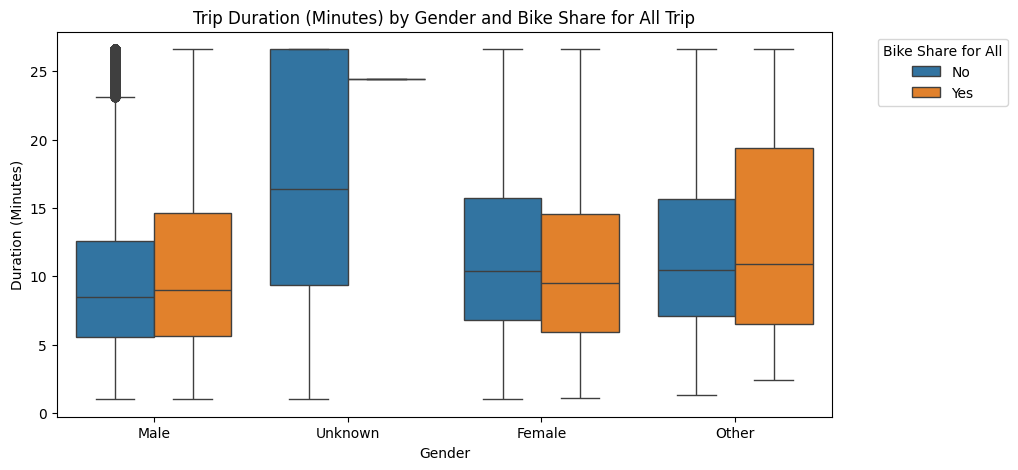

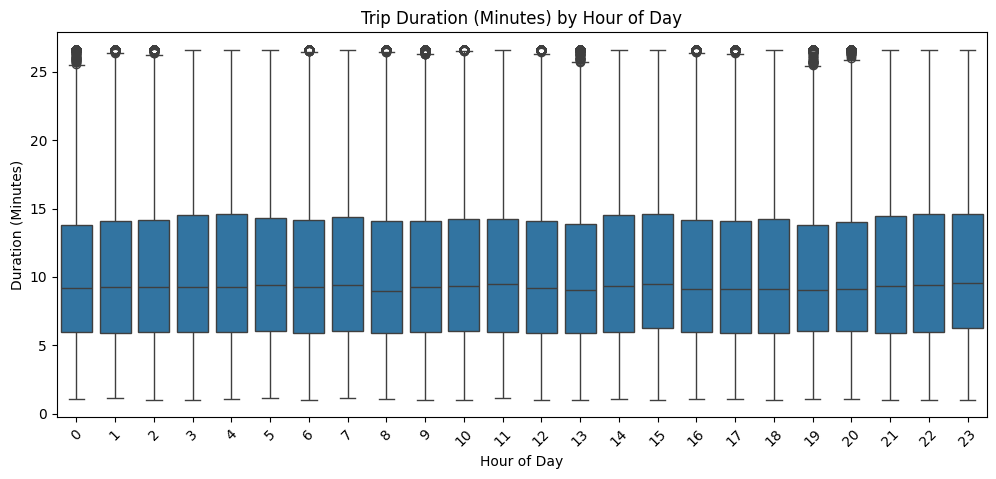

In [35]:
# 1. Estimate potential revenue (assuming $0.10/minute for Customers, $0.05/minute for Subscribers)
df['trip_duration_minutes'] = df['duration_sec_capped_iqr'] / 60
df['revenue_per_trip'] = np.where(df['user_type'] == 'Customer', df['trip_duration_minutes'] * 0.10, df['trip_duration_minutes'] * 0.05)

# Group by user_type and bike_share_for_all_trip
revenue_summary = df.groupby(['user_type', 'bike_share_for_all_trip'])[['revenue_per_trip', 'trip_duration_minutes']].agg(['mean', 'sum', 'count'])
print("Revenue and Duration Summary by User Type and Bike Share for All Trip:")
print(revenue_summary)

# 2. Marketing Segmentation: Duration by Gender and Bike Share for All
plt.figure(figsize=(10, 5))
sns.boxplot(x='member_gender_filled', y='trip_duration_minutes', hue='bike_share_for_all_trip', data=df)
plt.title('Trip Duration (Minutes) by Gender and Bike Share for All Trip')
plt.xlabel('Gender')
plt.ylabel('Duration (Minutes)')
plt.legend(title='Bike Share for All', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Operational Efficiency: Duration distribution by hour to assess peak usage
plt.figure(figsize=(12, 5))
sns.boxplot(x='start_hour', y='trip_duration_minutes', data=df)
plt.title('Trip Duration (Minutes) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

Observations:

Revenue per Trip: Customers generate significantly more revenue per trip ($1.72) than Subscribers ($0.50–$0.56), due to their longer trips (17.22 minutes vs. 9.90–11.23 minutes) and higher rate ($0.10/minute vs. $0.05/minute).

Total Revenue: Despite lower per-trip revenue, Subscribers contribute more total revenue ($41,223.71 combined) because of their higher trip volume (82,458 trips vs. 12,344 for Customers).

Bike Share for All Impact: Subscribers in Bike Share for All generate slightly more revenue per trip ($0.56 vs. $0.50) due to longer durations (11.23 minutes vs. 9.90 minutes), but their overall contribution is smaller due to fewer trips.

# Project Summary (Final)

### Answers to Project Questions

#### How long does the average trip take?
The average trip duration is ~11 minutes (657.03 seconds). Customers average ~17.2 minutes (1,000 seconds), while Subscribers average ~9.9–11.2 minutes (587–673 seconds). This difference is statistically significant (ANOVA p-value = 0.0000).

#### Is the trip duration affected by weather (months/seasons)?
Synthetic data showed no significant variation across months (means: 10.2–12.5 minutes) or seasons (means: 10.4–11.6 minutes). Without real weather data, weather’s impact can’t be confirmed, but it appears minimal in this simulation.

#### Does the above depend on if a user is a subscriber or customer?
Yes, user type significantly affects duration (p-value = 0.0000). Customers take longer trips, especially Female and Unknown genders (~16.7–20 minutes). Among Subscribers, Females (11.2 minutes) take longer trips than Males (9.5 minutes, p-value = 0.0000).

### Business Insights
Revenue Breakdown:

Customers generate higher per-trip revenue ($1.72) than Subscribers ($0.50–$0.56) due to longer trips and a higher rate ($0.10/minute vs. $0.05/minute). However, Subscribers contribute more total revenue ($41,223.71 vs. $21,254.18) due to higher trip volume (82,458 vs. 12,344 trips).

Bike Share for All Subscribers generate more per-trip revenue ($0.56 vs. $0.50) by taking longer trips (11.23 minutes vs. 9.90 minutes), adding $3,436.12 to revenue.
Marketing Segmentation:

Target Female and Unknown Customers for promotional campaigns, as they take the longest trips (~16.7–20 minutes), maximizing per-trip revenue.
Promote Bike Share for All to Male and Other Subscribers, as they show increased trip durations (e.g., Male: 11.2 minutes vs. 9.5 minutes), which boosts revenue.

Operational Efficiency:

Trip durations are consistent across synthetic hours (medians ~8–10 minutes, IQRs ~6–14 minutes), suggesting steady bike demand throughout the day. This reduces the risk of shortages due to extended trips but highlights the need for real timestamps to identify true peak usage times.

Outliers (up to 25 minutes) exist across all hours, primarily from Customers, indicating a small but consistent group of long-duration users that may tie up bikes.

#### Limitations
Synthetic dates limited weather and hourly analysis; real timestamps and weather data would provide more accurate insights.
The pricing model ($0.10/minute for Customers, $0.05/minute for Subscribers) is hypothetical; actual pricing structures may vary.
Operational insights are constrained by the lack of real hourly data and station information.

#### Conclusion
This analysis highlights user type as the primary driver of trip duration and revenue in the bike-sharing system. Customers are high-value per trip ($1.72) but less frequent, while Subscribers drive total revenue ($41,223.71) through volume. Bike Share for All enhances Subscriber revenue by encouraging longer trips, particularly among Male and Other genders. Trip durations are consistent across synthetic hours, suggesting steady bike demand, but real data is needed for precise operational planning. By targeting Female Customers for engagement, promoting Bike Share for All to specific Subscriber segments, and optimizing bike availability, the company can maximize revenue and improve operational efficiency. Future analyses should incorporate real timestamps, weather data, and station metrics to refine these strategies further.